Fateme Ranjbaran 400126060
#to see the implemented code for the section 3 roll down. there are some other useful implementations first which are not requested in the question.

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Jan 29 10:34:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    15W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# MLP

In [3]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# Configuration options
feature_vector_length = 28 * 28
num_classes = 10


# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28  pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)



# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

import time
start_time = time.time()


history = model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

print()
print("--- %s seconds ---" % (time.time() - start_time))

# model.fit(X_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/50
844/844 [==============================] - 5s 3ms/step - loss: 0.4992 - accuracy: 0.8214 - val_loss: 0.4161 - val_accuracy: 0.8457
Epoch 2/50
844/844 [==============================] - 3s 3ms/step - loss: 0.3740 - accuracy: 0.8626 - val_loss: 0.3655 - val_accuracy: 0.8635
Epoch 3/50
844/844 [==============================] - 3s 3ms/step - loss: 0.3398 - accuracy: 0.8745 - val_loss: 0.3390 - val_accuracy: 0.8770
Epoch 4/50
844/844 [==============================] - 3s 3ms/step - loss: 0.3157 - accuracy: 0.8834 - val_loss: 0.3618 - val_accuracy: 0.8650
Epoch 5/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2965 - accuracy: 0.8891 - val_loss: 0.3179 - val_accuracy: 0.8825
Epoch 6/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2809 - accuracy: 0.8958 - val_loss: 0.3354 - val_accuracy: 0.8745
Epoch 7/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2667 - accuracy: 0.9017 - val_loss: 0.3226 - val_a

# CONV2d

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## fashion_MNIST dataset

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
print(datasets.keys())
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
dict_keys(['test', 'train'])


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

In [ ]:
mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE,
                                  reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

## Constructing a CNN in Keras

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
    
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

In [ ]:
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 7, 7, 64])

In [ ]:
model.add(tf.keras.layers.Flatten())
    
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

In [ ]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

In [ ]:
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 10])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              3212288   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS, 
                    validation_data=mnist_valid, 
                    shuffle=True)

Epoch 1/20
782/782 [==============================] - 12s 10ms/step - loss: 0.1379 - accuracy: 0.9572 - val_loss: 0.0476 - val_accuracy: 0.9852
Epoch 2/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0406 - val_accuracy: 0.9876
Epoch 4/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 5/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0375 - val_accuracy: 0.9903
Epoch 6/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0418 - val_accuracy: 0.9893
Epoch 7/20
782/782 [==============================] - 10s 12ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0435 - val_accuracy: 0.9911
E

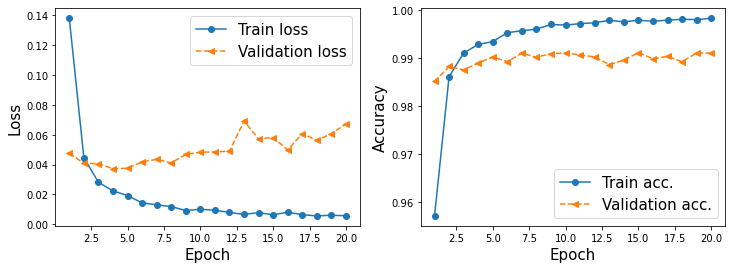

In [ ]:
import numpy as np
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [ ]:
test_results = model.evaluate(mnist_test.batch(20))
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

500/500 [==============================] - 2s 4ms/step - loss: 0.0349 - accuracy: 0.9935

Test Acc. 99.35%


TensorShape([12, 10])
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


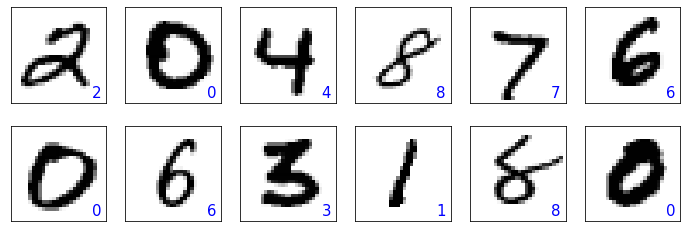

In [ ]:
batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
#plt.savefig('figures/15_13.png', dpi=300)
plt.show()

In [6]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [7]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)



# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


num_classes = 10

# Convert target classes to categorical ones
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


# Create the model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
    
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

model.compute_output_shape(input_shape=(16, 28, 28, 1))

model.add(tf.keras.layers.Flatten())
    
model.compute_output_shape(input_shape=(16, 28, 28, 1))

model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compute_output_shape(input_shape=(16, 28, 28, 1))




# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

import time
start_time = time.time()


history = model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

print()
print("--- %s seconds ---" % (time.time() - start_time))

# model.fit(X_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/50
844/844 [==============================] - 12s 5ms/step - loss: 0.4425 - accuracy: 0.8408 - val_loss: 0.2947 - val_accuracy: 0.8900
Epoch 2/50
844/844 [==============================] - 7s 8ms/step - loss: 0.2847 - accuracy: 0.8954 - val_loss: 0.2596 - val_accuracy: 0.9037
Epoch 3/50
844/844 [==============================] - 6s 7ms/step - loss: 0.2408 - accuracy: 0.9110 - val_loss: 0.2433 - val_accuracy: 0.9098
Epoch 4/50
844/844 [==============================] - 4s 5ms/step - loss: 0.2093 - accuracy: 0.9218 - val_loss: 0.2307 - val_accuracy: 0.9160
Epoch 5/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1847 - accuracy: 0.9320 - val_loss: 0.2257 - val_accuracy: 0.9180
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1633 - accuracy: 0.9388 - val_loss: 0.2291 - val_accuracy: 0.9172
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1426 - accuracy: 0.9465 - val_loss: 0.2280 - val_accuracy: 0.9228
Epoch

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              3212288   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print('Precision: %.3f' % precision_score( y_true=y_test, y_pred=y_pred ,  average='macro'))

print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred ,  average='macro'))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred ,  average='macro'))

313/313 [==============================] - 1s 2ms/step
Precision: 0.919
Recall: 0.917
F1: 0.918


In [9]:
import numpy as np
y_real = np.argmax(y_test , axis=1)
y_pred = tf.argmax(model(X_test), axis=1).numpy()

In [10]:
wrong_pred = np.where(y_pred != y_real)
len(wrong_pred[0])

826

In [11]:
(10000-765)/10000

0.9235

In [18]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, y_pred)

array([[[8899,  101],
        [ 159,  841]],

       [[8989,   11],
        [  14,  986]],

       [[8866,  134],
        [ 129,  871]],

       [[8922,   78],
        [  75,  925]],

       [[8859,  141],
        [ 124,  876]],

       [[8987,   13],
        [  24,  976]],

       [[8742,  258],
        [ 216,  784]],

       [[8968,   32],
        [  42,  958]],

       [[8993,    7],
        [  23,  977]],

       [[8956,   44],
        [  21,  979]]])

## Wrong predicted

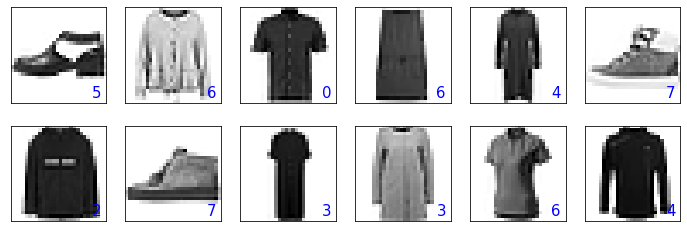

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = X_test[wrong_pred[0][i]]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(y_pred[wrong_pred[0][i]]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
#plt.savefig('figures/15_13.png', dpi=300)
plt.show()

In [ ]:
print("real class    predicted class")
for i in range(12):
  print( "    "  ,y_real[wrong_pred[0][i]] , "          "  ,y_pred[wrong_pred[0][i]])

real class    predicted class
     9            5
     4            6
     6            0
     3            6
     3            4
     9            7
     4            2
     9            7
     6            3
     4            3
     0            6
     2            4
